**Gradute Admission Prediction Using ANN**

1. Its regressio problem
2. 500 records
3. 2 hidden layer with 7 nodes
4. output layer
5. epocs 100

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("Admission_Predict.csv")

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
# no deep of serial number for model so i drop it
df.drop("Serial No.",axis=1,inplace=True)

In [10]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
X=df.iloc[:,:0:-1]
y=df.iloc[:,-1]

In [12]:
X

,Chance of Admit,Research,CGPA,LOR,SOP,University Rating,TOEFL Score
0,0.92,1,9.65,4.5,4.5,4,118
1,0.76,1,8.87,4.5,4.0,4,107
2,0.72,1,8.00,3.5,3.0,3,104
3,0.80,1,8.67,2.5,3.5,3,110
4,0.65,0,8.21,3.0,2.0,2,103
...,...,...,...,...,...,...,...
495,0.87,1,9.02,4.0,4.5,5,108
496,0.96,1,9.87,5.0,5.0,5,117
497,0.93,1,9.56,5.0,4.5,5,120
498,0.73,0,8.43,5.0,4.0,4,103


In [13]:
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
495,0.87
496,0.96
497,0.93
498,0.73


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [15]:
X_train

,Chance of Admit,Research,CGPA,LOR,SOP,University Rating,TOEFL Score
238,0.70,0,8.37,3.5,2.0,3,104
438,0.67,1,8.54,3.5,2.5,1,110
475,0.59,0,7.88,2.5,3.5,3,101
58,0.36,1,6.80,2.0,3.0,1,99
380,0.78,1,8.84,4.0,3.5,3,104
...,...,...,...,...,...,...,...
255,0.79,0,8.37,4.5,4.0,4,110
72,0.93,1,9.45,5.0,5.0,5,111
396,0.84,1,9.11,3.5,3.0,3,107
235,0.88,1,9.23,4.0,4.5,5,111


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [18]:
X_train_scaled

array([[0.57142857, 0.        , 0.50320513, ..., 0.25      , 0.5       ,
        0.42857143],
       [0.52380952, 1.        , 0.55769231, ..., 0.375     , 0.        ,
        0.64285714],
       [0.3968254 , 0.        , 0.34615385, ..., 0.625     , 0.5       ,
        0.32142857],
       ...,
       [0.79365079, 1.        , 0.74038462, ..., 0.5       , 0.5       ,
        0.53571429],
       [0.85714286, 1.        , 0.77884615, ..., 0.875     , 1.        ,
        0.67857143],
       [0.38095238, 0.        , 0.32051282, ..., 0.        , 0.        ,
        0.46428571]])

In [21]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [22]:
model=Sequential()

In [23]:
model.add(Dense(7,activation="relu",input_dim=7))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="linear")) # for regression problem the activation function always linear

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss="mean_squared_error",optimizer="Adam") # for regression loss is mean squred error

In [26]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.7371 - val_loss: 0.5468
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4691 - val_loss: 0.3597
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3104 - val_loss: 0.2554
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2246 - val_loss: 0.1884
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1652 - val_loss: 0.1398
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1191 - val_loss: 0.1031
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0866 - val_loss: 0.0753
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0655 - val_loss: 0.0543
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0452 - val_loss: 0.0391
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0359 - val_loss: 0.0286
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0248 - val_loss: 0.0226
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.

In [27]:
y_pred=model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [28]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9684475638244576

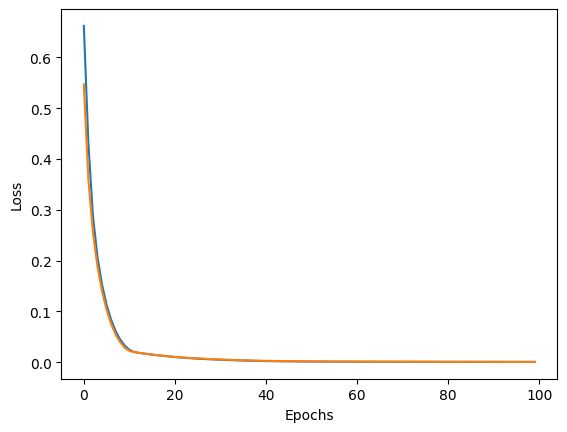

In [29]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

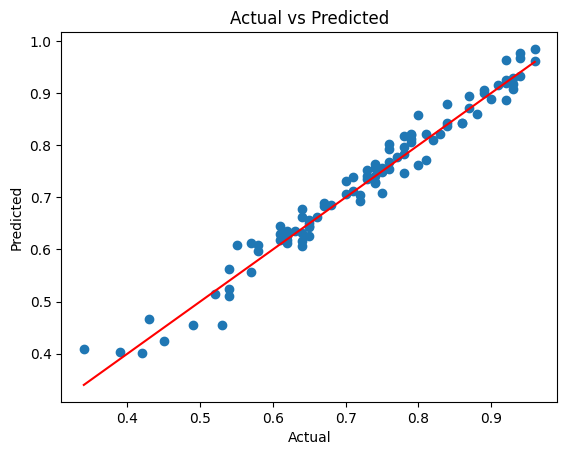

In [30]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect line
plt.show()

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 0.0193
MSE: 0.0006
RMSE: 0.0247
R² Score: 0.9684
